In [1]:
import pandas as pd
import numpy as np
import re

from torch import nn
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from sentence_transformers import *
import torchvision.models as models


import torch.nn as nn
from transformers import BertModel, BertTokenizer
import torch.nn as nn
import torch.nn.functional as F
from sentence_transformers import SentenceTransformer, util
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from torch.nn import Transformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import PIL
import tensorflow as tf
import keras_toolkit as kt
import keras.backend as K
from sklearn.model_selection import train_test_split
from textwrap import wrap

/home/vscode/.venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-04-16 15:15:33.859906: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-04-16 15:15:38.483298: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
training_dataset = pd.read_csv('/workspaces/Shopee-Price-Match-Guarantee/15_after_processed/train.csv')
val_dataset = pd.read_csv('/workspaces/Shopee-Price-Match-Guarantee/15_after_processed/val.csv')
testing_dataset = pd.read_csv('/workspaces/Shopee-Price-Match-Guarantee/15_after_processed/test.csv')

In [3]:
IMG_SIZE = 224
size = (IMG_SIZE,IMG_SIZE)
img_model = tf.keras.applications.resnet50.ResNet50(input_shape = (IMG_SIZE, IMG_SIZE, 3), include_top = False, weights = 'imagenet' )

2023-04-16 15:15:41.745859: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [4]:
def get_imageEmbeddings(model,imagePath):
    image = tf.keras.preprocessing.image.load_img(imagePath,target_size= size)
    input_arr = tf.keras.preprocessing.image.img_to_array(image)
    input_arr = np.array([input_arr])
    img_embeddings = model(input_arr)
    meanImgEmb1 = np.mean(img_embeddings,axis =0)
    meanImgEmb2 = np.mean(meanImgEmb1,axis=0)
    meanImgEmb = np.mean(meanImgEmb2,axis=0)
    return meanImgEmb

In [5]:
image_embeddings={}
for index,row in  training_dataset.iterrows():
    imagePath = '/workspaces/Shopee-Price-Match-Guarantee/00_source_data/shopee-product-matching/train_images/'+row[1]
    img_emb = get_imageEmbeddings(img_model,imagePath)
    image_embeddings[row[0]] = img_emb

val_image_embeddings={}
for index,row in  val_dataset.iterrows():
    imagePath = '/workspaces/Shopee-Price-Match-Guarantee/00_source_data/shopee-product-matching/train_images/'+row[1]
    img_emb = get_imageEmbeddings(img_model,imagePath)
    val_image_embeddings[row[0]] = img_emb

test_image_embeddings={}
for index,row in  testing_dataset.iterrows():
    imagePath = '/workspaces/Shopee-Price-Match-Guarantee/00_source_data/shopee-product-matching/train_images/'+row[1]
    img_emb = get_imageEmbeddings(img_model,imagePath)
    test_image_embeddings[row[0]] = img_emb

Bad pipe message: %s [b'\xab\x99\xc8z\x9a\x18jx\n\x89\xd9\x86JI\x05/i\x86\x00\x00|\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0', b"]\xc0a\xc0W\xc0S\xc0+\xc0/\x00\xa2\x00\x9e\xc0\xae\xc0\xac\xc0\xa2\xc0\x9e\xc0\\\xc0`\xc0V\xc0R\xc0$\xc0(\x00k\x00j\xc0#\xc0'\x00g\x00@\xc0\n\xc0\x14\x009\x008\xc0\t\xc0\x13\x003\x002\x00\x9d\xc0\xa1\xc0\x9d\xc0Q\x00\x9c\xc0\xa0\xc0\x9c\xc0P\x00=\x00<\x005\x00/\x00\x9a\x00\x99\xc0\x07\xc0\x11\x00\x96\x00\x05\x00\xff\x01\x00\x00j\x00\x00\x00\x0e\x00\x0c\x00\x00\t127.0.0.1\x00\x0b\x00\x04\x03\x00\x01\x02\x00\n\x00\x0c\x00\n\x00\x1d\x00\x17\x00\x1e\x00\x19\x00\x18\x00#\x00\x00\x00\x16\x00\x00\x00\x17\x00"]
Bad pipe message: %s [b'\x968L=f\\)\xdae\xc2\xdd\x1d\x85\xb2\xbbb\xb2\x0c\x00\x00\xa6\xc0,\xc00\x00\xa3\x00\x9f\xcc\xa9\xcc\xa8\xcc\xaa\xc0\xaf\xc0\xad\xc0\xa3\xc0\x9f\xc0]\xc0a\xc0W\xc0S\xc0+']
Bad pipe message: %s [b'\x7f#|\xec7\xc3)l\xfa/\xca0K4\xd2\xe3\x90\xe3\x00\x00>\xc0\x14\xc0\n\x009\x008\x007\x006\xc0\x0f\xc0\x05\x0

Text(0, 0.5, 'Score')

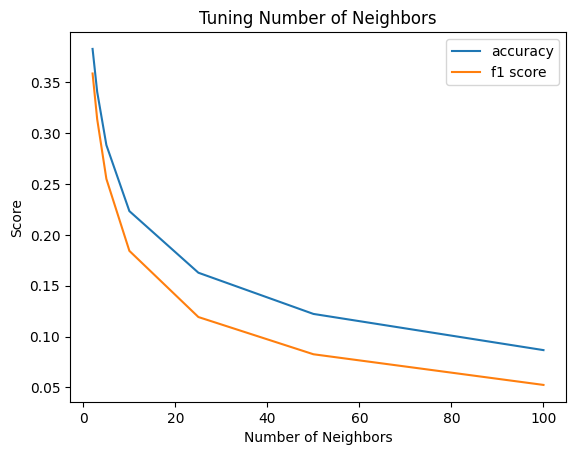

In [6]:
acc_dict = {}
f1_dict = {}
X_train, X_val, y_train, y_val = list(image_embeddings.values()), list(val_image_embeddings.values()), training_dataset.label_group, val_dataset.label_group


from sklearn.metrics import accuracy_score, f1_score
for k in [2, 3, 5, 10, 25, 50, 100]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)

    # Evaluate the performance on the test set
    accuracy = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred, average='weighted')
    acc_dict[k] = accuracy
    f1_dict[k] = f1

plt.plot(acc_dict.keys(), acc_dict.values(), label='accuracy')
plt.plot(f1_dict.keys(), f1_dict.values(), label='f1 score')
plt.legend()
plt.title('Tuning Number of Neighbors')
plt.xlabel('Number of Neighbors')
plt.ylabel('Score')


In [8]:
X_test, y_test = list(test_image_embeddings.values()), testing_dataset.label_group

knn = KNeighborsClassifier(n_neighbors=max(acc_dict, key=acc_dict.get))
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Accuracy = {accuracy}')
print(f'F1 score = {f1}')

Accuracy = 0.37416058394160584
F1 score = 0.34650835993055373


In [ ]:
import csv
i = open("image_embeddings.csv", "w")
image_file = csv.writer(i)
